# Linear Regression Problem

## What is Linear Regression?
Modeling the linear relationship between the <ins>dependent variable</ins> and <ins>independent variable</ins>.

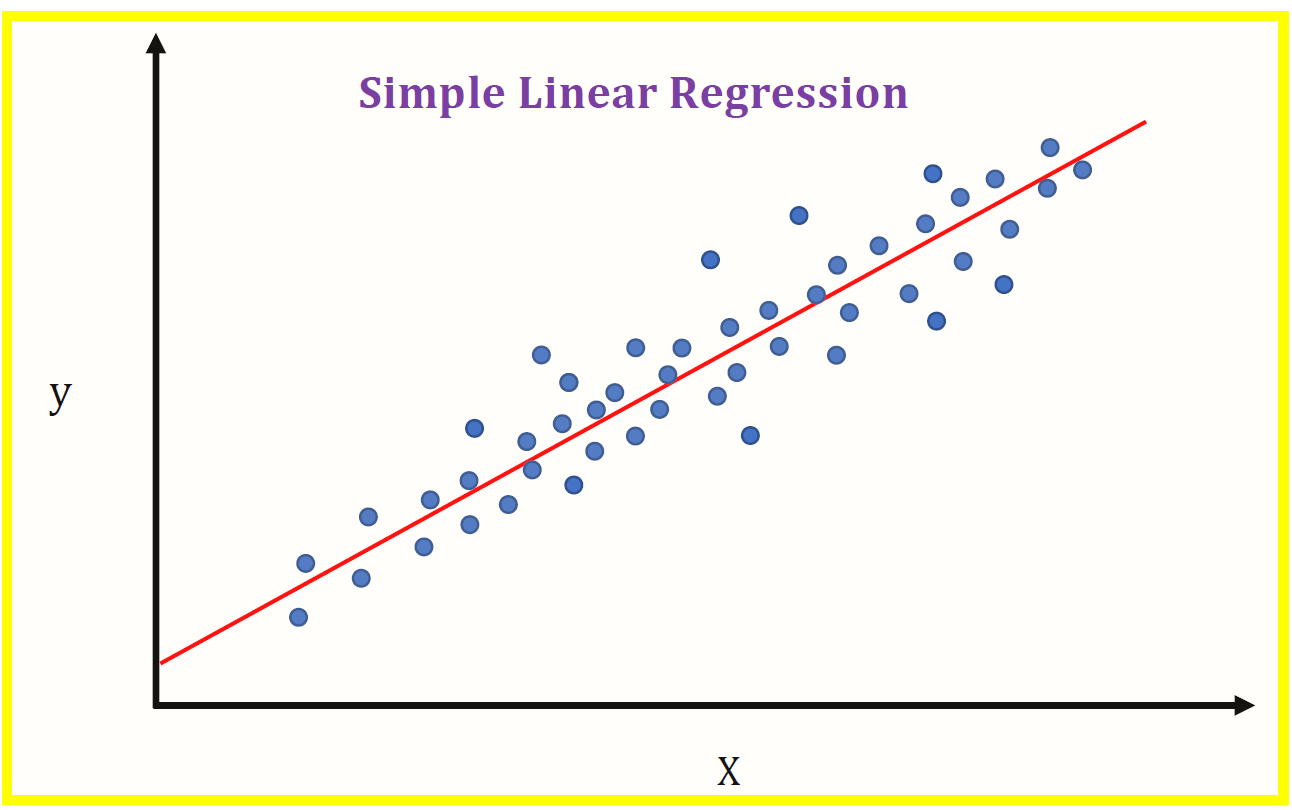

In [23]:
display(Image(filename="image/fig1.png"))

### Theory
$\underbrace{\hat{y}}_{Prediction} = \underbrace{h(x,\theta)}_{hypothesis,with\,parameter\,\theta} + \underbrace{\epsilon}_{Numerical\,Stabiility,\,or\,error}$<br><br>

This can be represented as the linear combination form as:<br><br>
$\hat{y} = \theta_0+\theta_1x+\theta_2x^2+...$<br><br>



In vector form, this is:<br><br>
$\hat{y} = \theta^T\bar{x}$, where $\theta = [\theta_0,\theta_1,\theta_2,...],\,and\,\bar{x}=[1,x,x^2,...]$

### Loss (Cost) Function (MSE)
$J(x,0,y)=\frac{1}{2m}\sum_{i = 1}^m {(h(x_i)-y_i})^2$, where m = number of samples

# Gradient Descend Algorithm

## What is Gradient Descend Algorithm?
Generic optimization algorithm which computes the $\nabla_\theta J$, gradient($\nabla$) of the loss function $J$ with respect to the term $\theta$ to tweak the parameter $\theta$ iteratively to minimize the loss function.

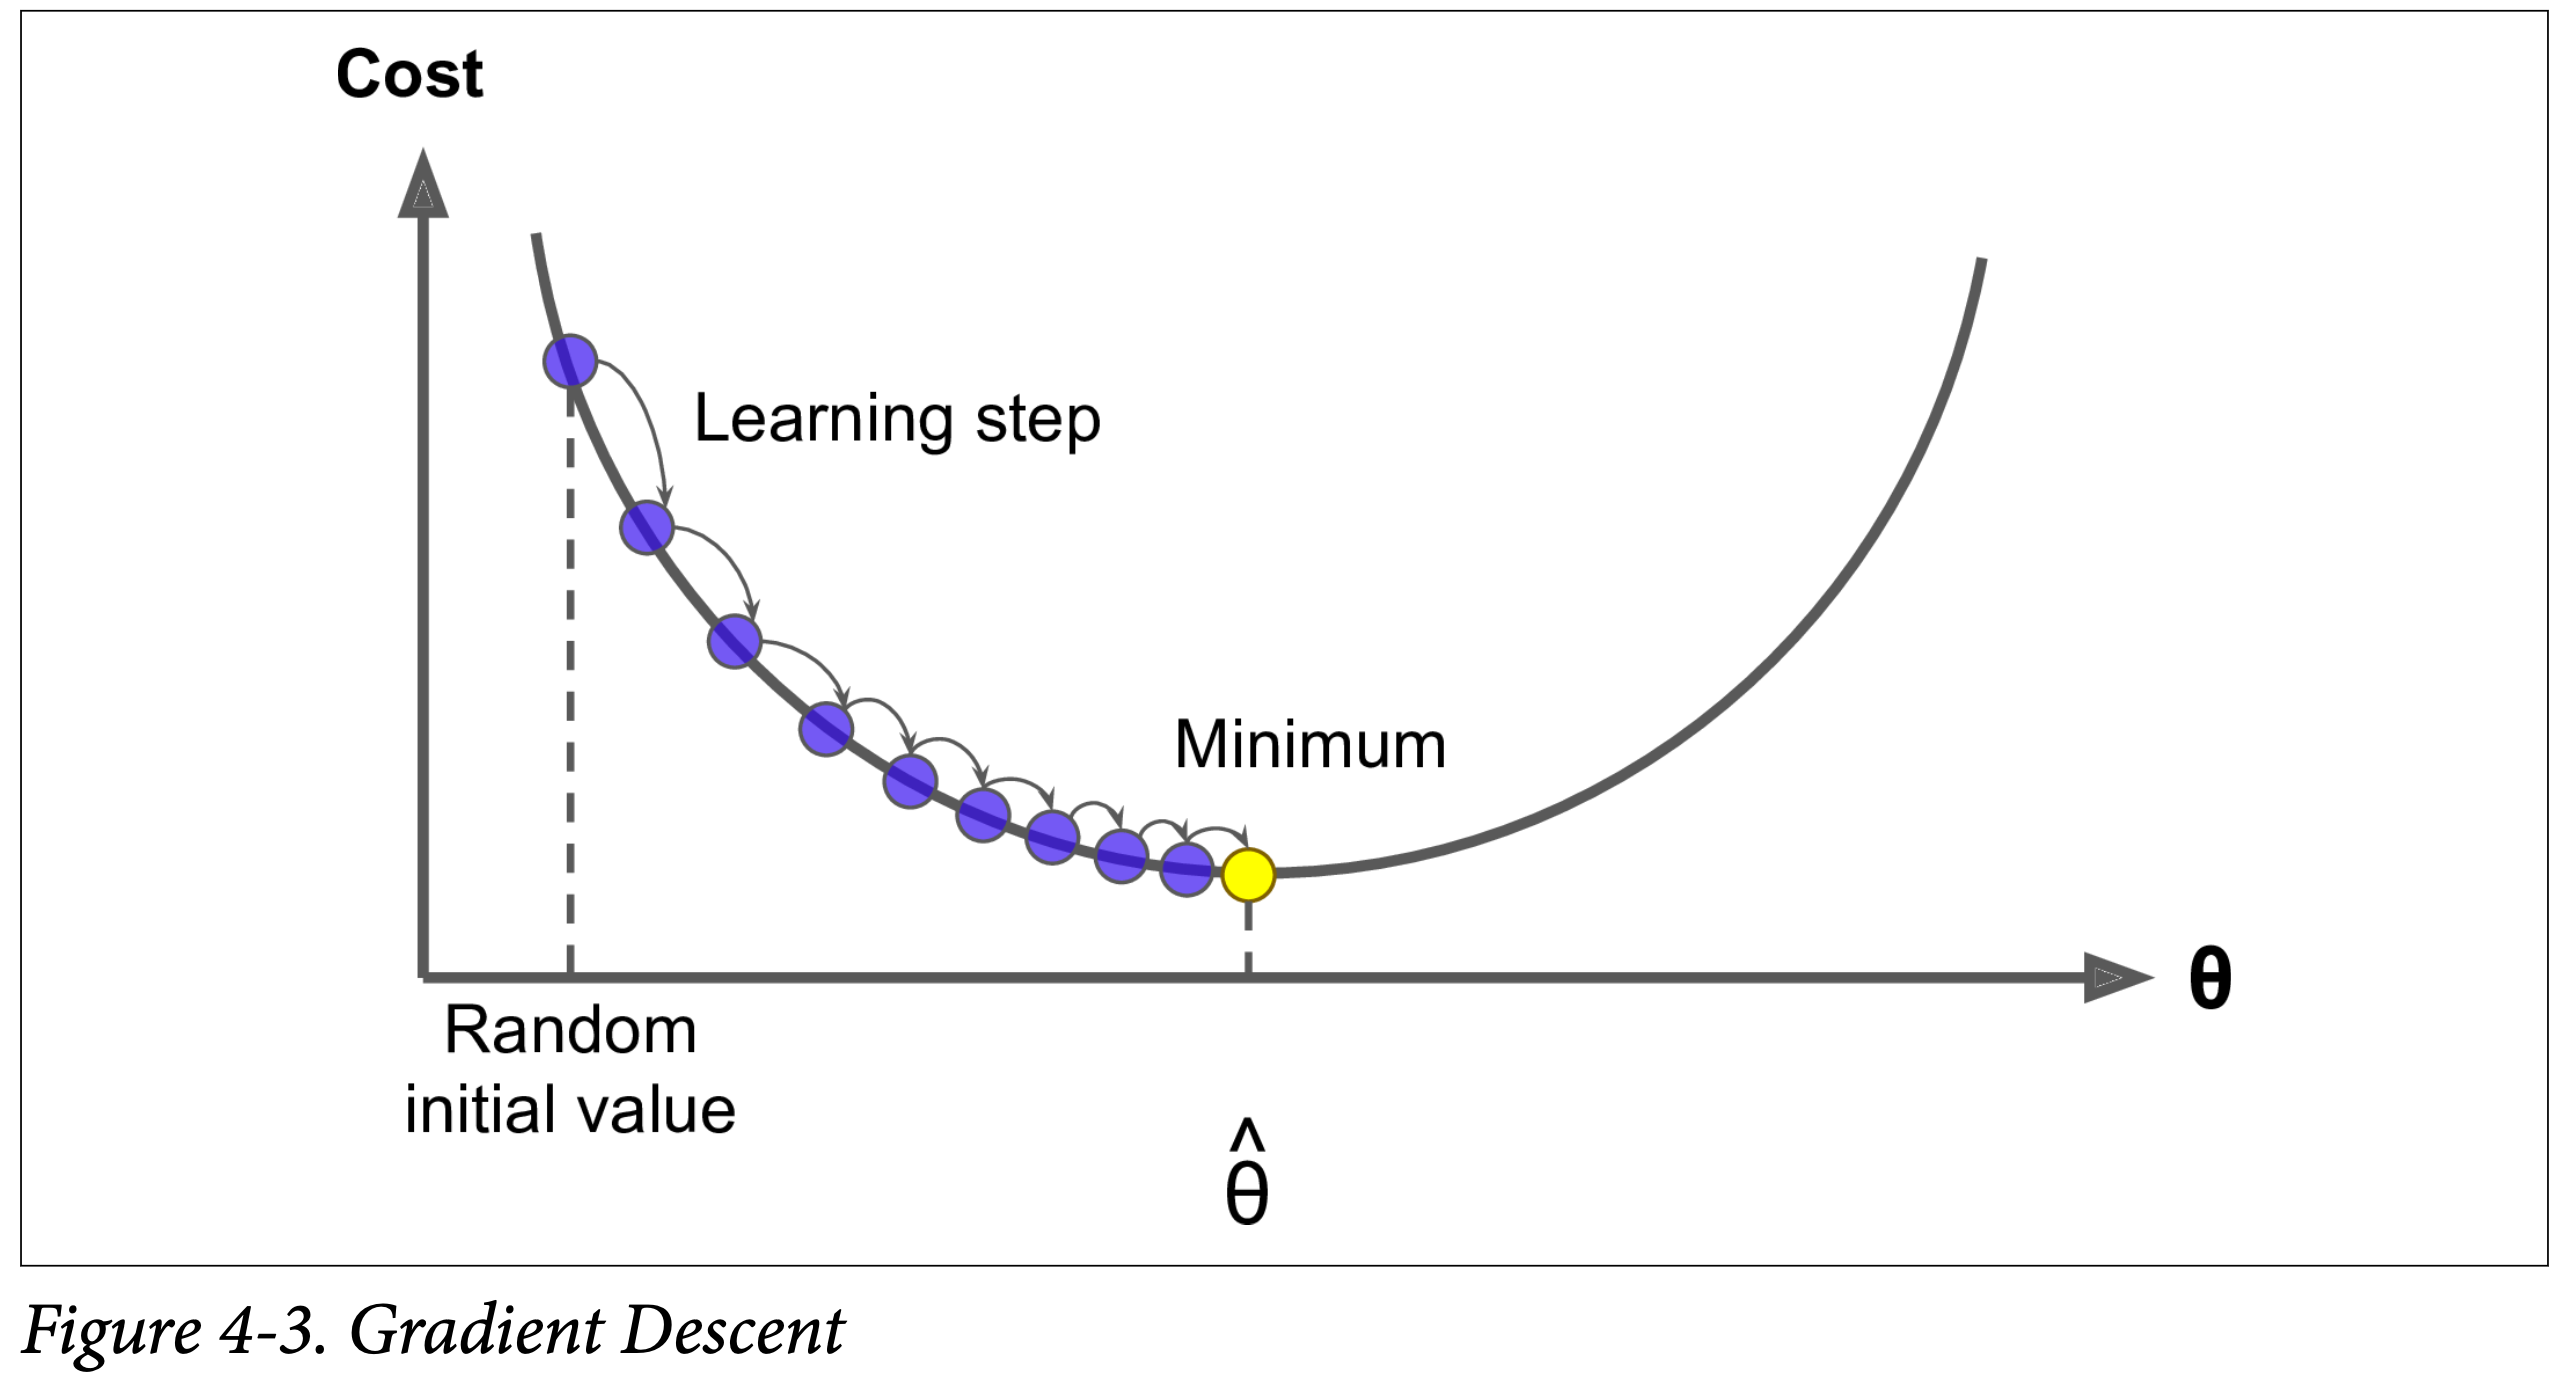

In [53]:
display(Image(filename="image/fig2.png"))

### Equation which tweaks the parameter $\theta$:
$\theta^{+}=\theta^{-}-\alpha\nabla_\theta J$, where
- $\theta$ = new parameter
- $\theta^{-}$ = current parameter
- $\alpha$ = scaling parameter, which is the size and direction of steps (<ins>**IMPORTANT!**</ins>) determined based on the learning rate


### Grdient of loss:
$\nabla_\theta J = \frac{1}{m} \sum_{i = 1}^m {(\hat{y_i}-y_i)\bar{x_i}}$

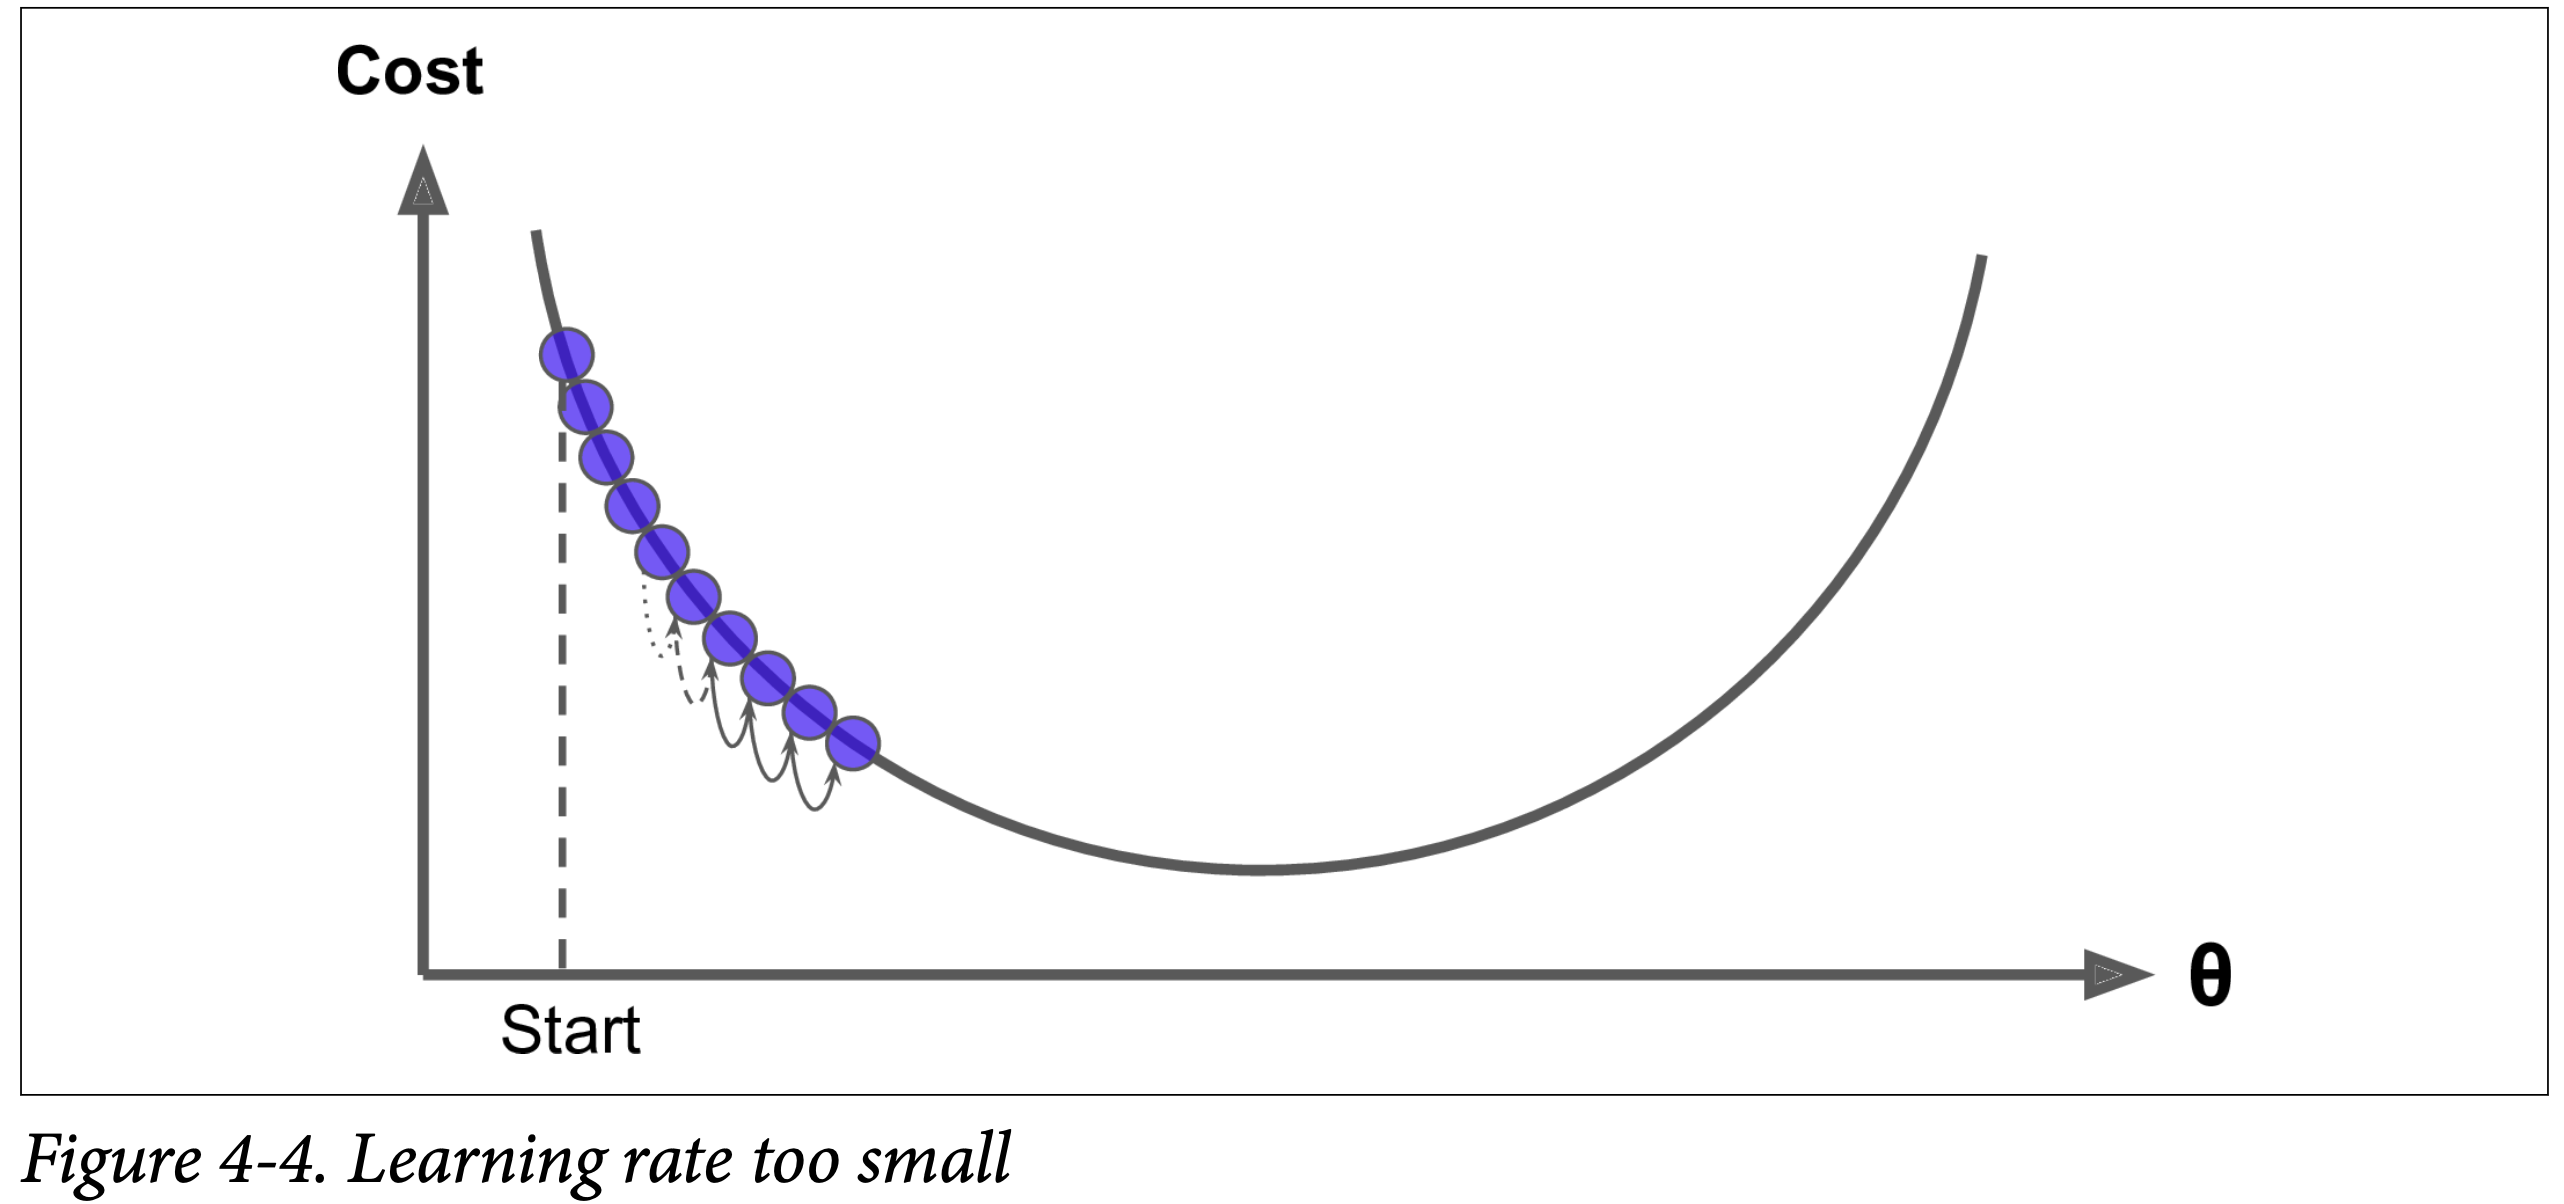

In [54]:
display(Image(filename="image/fig3.png"))

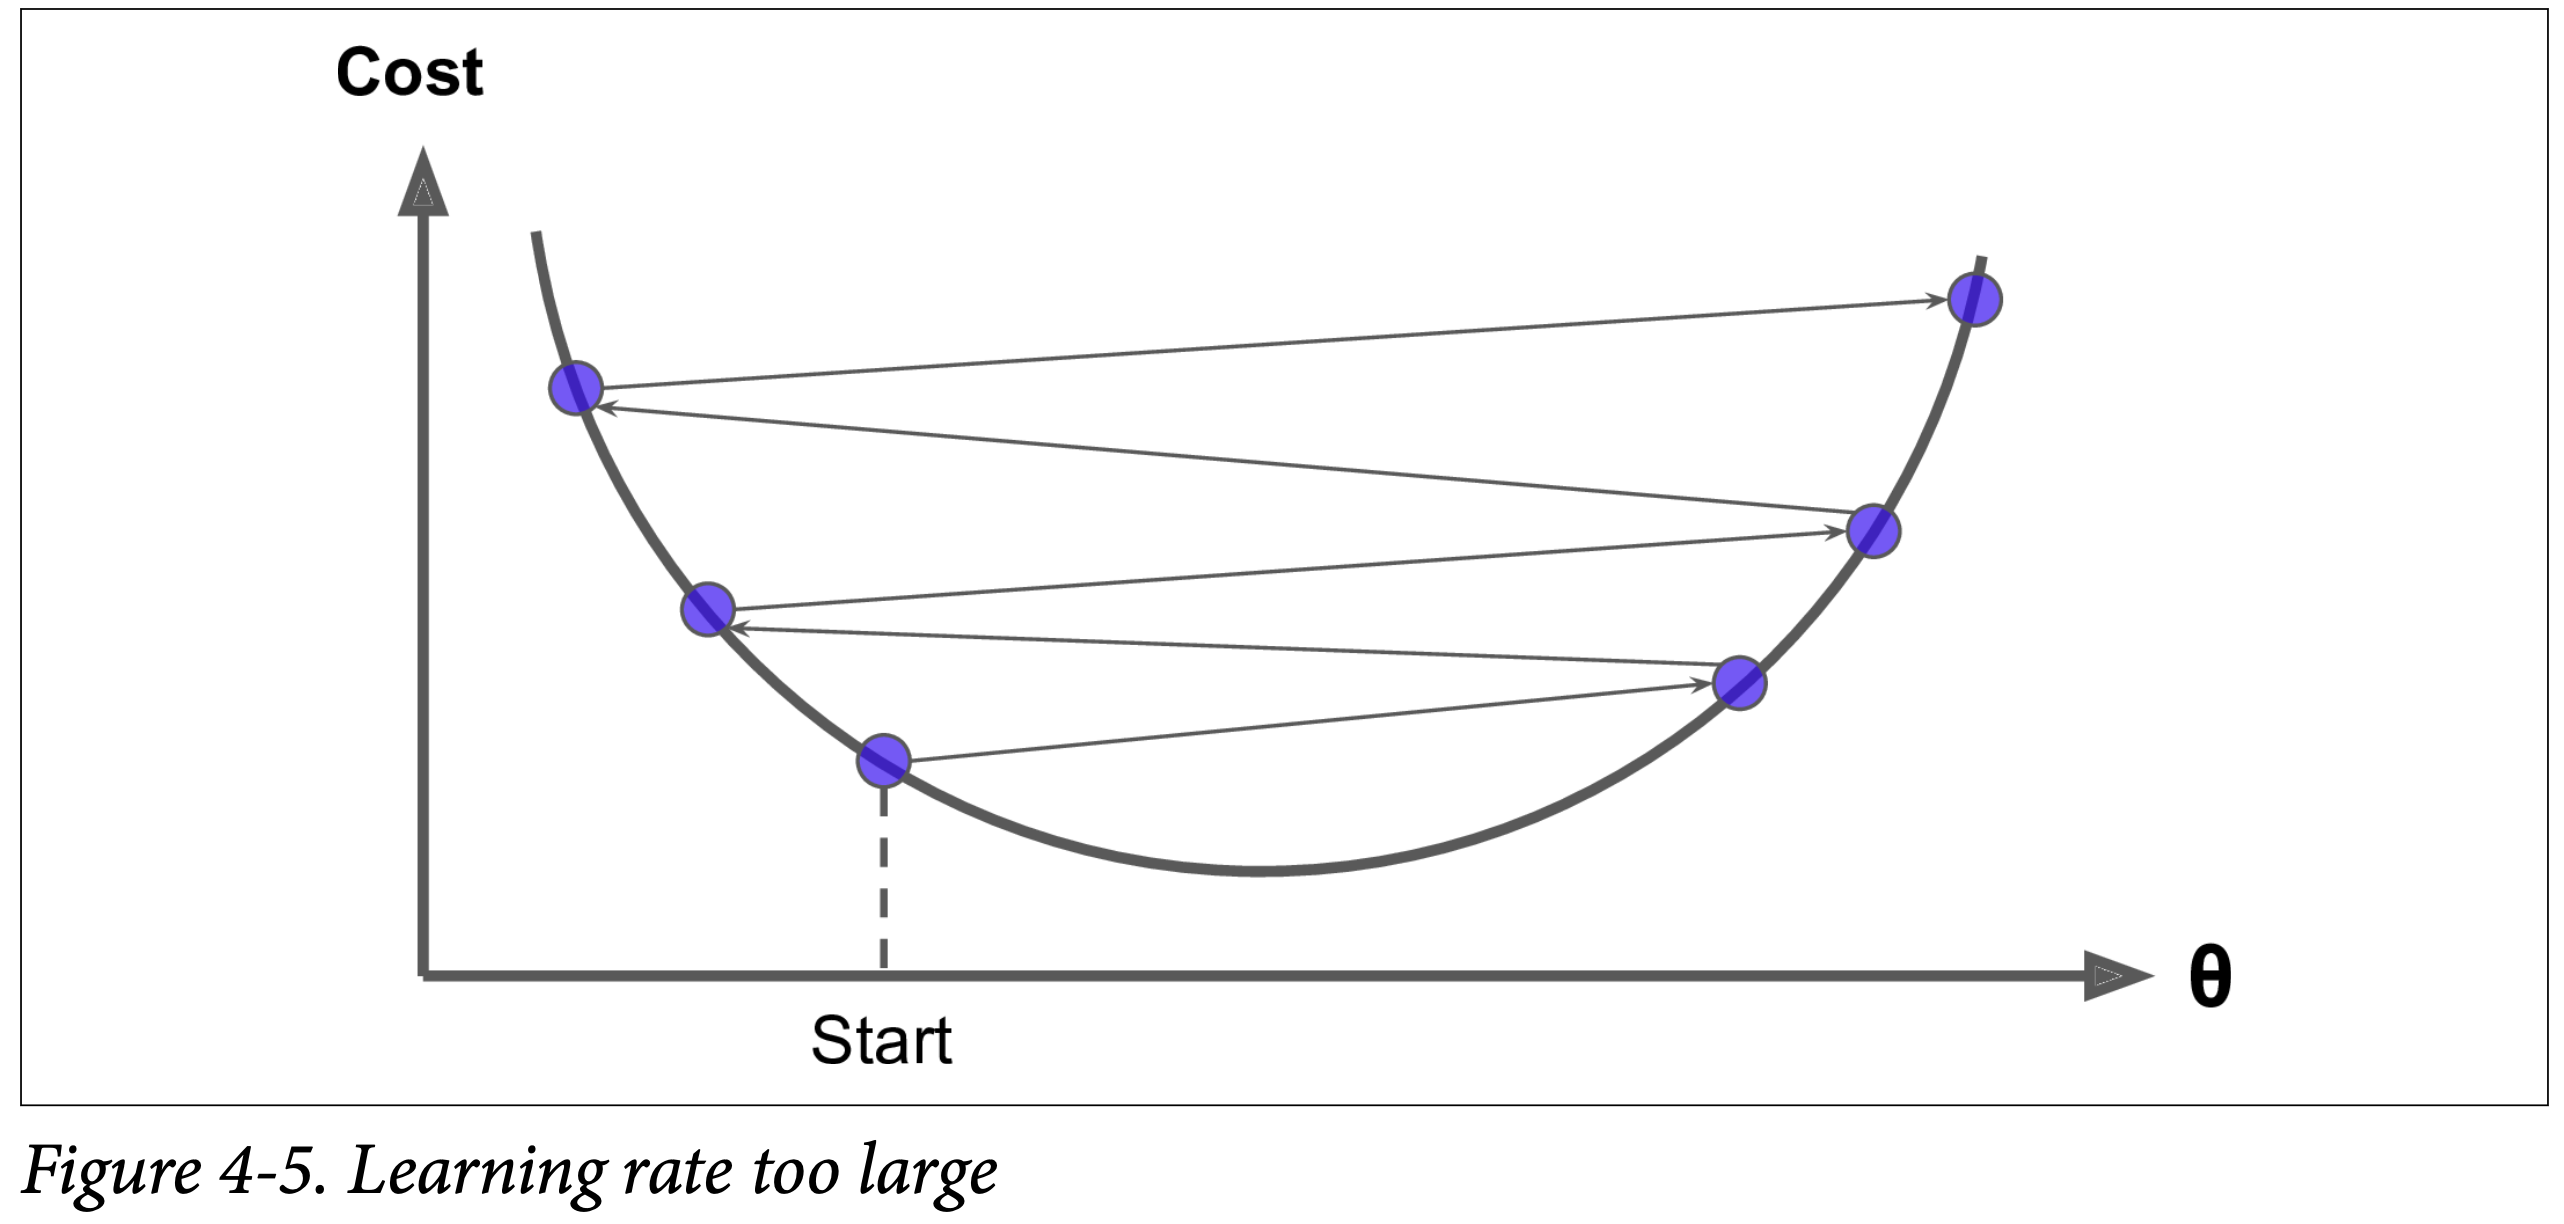

In [55]:
display(Image(filename="image/fig4.png"))

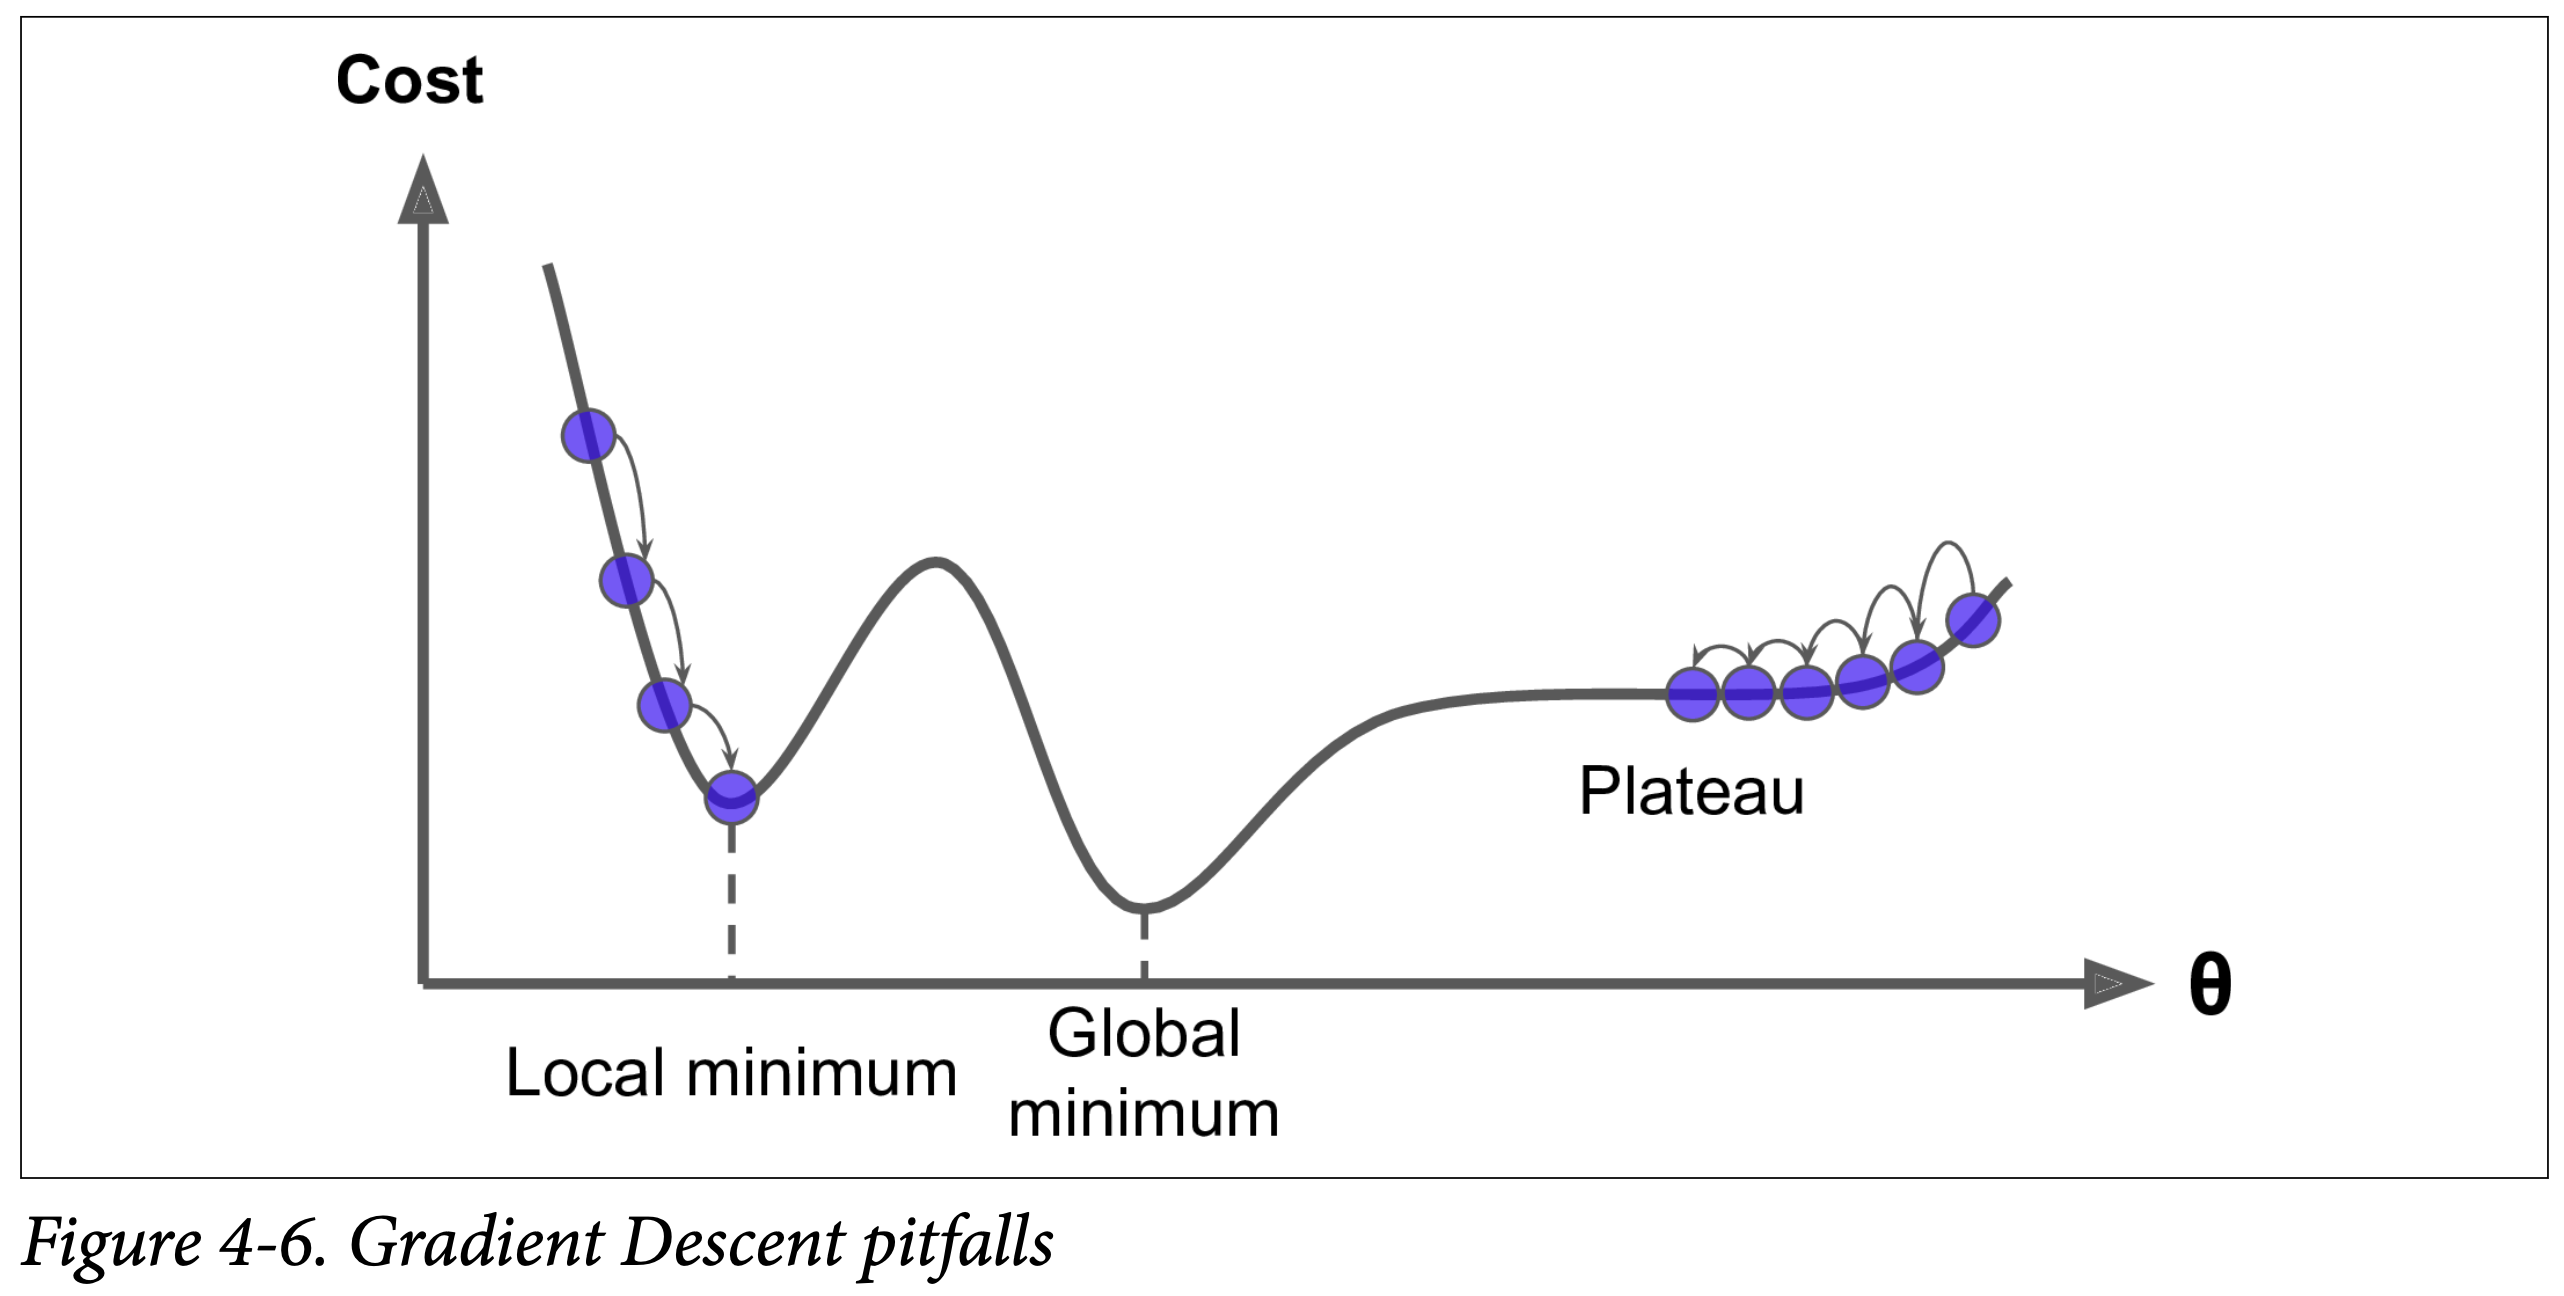

In [56]:
display(Image(filename="image/fig5.png"))

In [43]:
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Generate data
true_slope = 10.889
true_intercept = 3.456
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 500.0 * np.random.rand(len(input_var))

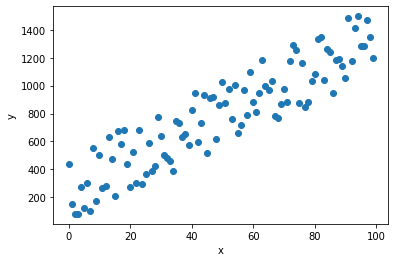

In [45]:
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [46]:
def compute_loss(input_var, output_var, params):
    "Compute linear regression loss"
    num_samples = input_var.shape[0]
    loss_sum = 0.0
    for x,y in zip(input_var, output_var):
        y_hat = np.dot(params, np.array([1.0, x]))
        loss_sum += (y_hat - y) ** 2
    
    loss = loss_sum / (num_samples * 2.0)
    
    return loss

# Batch Gradient Descend (BGD)

In Batch Gradient Descent, all the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters. So that’s just one step of gradient descent in one epoch.

In [47]:
def lin_reg_batch_gradient_descent(input_var, output_var, params, alpha, max_iter):
    """Compute the params for linear regression using batch gradient descent""" 
    iteration = 0
    num_samples = len(input_var)
    loss = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    
    while iteration < max_iter:
        loss[iteration] = compute_loss(input_var, output_var, params)
        params_store[:, iteration] = params # store the parameter
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'loss: {loss[iteration]}')
        
        for x,y in zip(input_var, output_var):
            y_hat = np.dot(params, np.array([1.0, x]))
            gradient = np.array([1.0, x]) * (y - y_hat)
            params += alpha * gradient/num_samples
            
        iteration += 1
    
    return params, loss, params_store

In [48]:
"""Train the model"""
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20) #80% training, 20% testing

params_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3 # learning rate
max_iter = 500 # maximum iteration
params_hat_batch, loss_batch, params_store_batch =\
    lin_reg_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)

---
iteration: 200
loss: 16708.991363391695
--------------------------
iteration: 201
loss: 16706.54411887461
--------------------------
iteration: 202
loss: 16704.09803760863
--------------------------
iteration: 203
loss: 16701.65311904049
--------------------------
iteration: 204
loss: 16699.209362617225
--------------------------
iteration: 205
loss: 16696.766767786146
--------------------------
iteration: 206
loss: 16694.325333994806
--------------------------
iteration: 207
loss: 16691.885060691016
--------------------------
iteration: 208
loss: 16689.445947322864
--------------------------
iteration: 209
loss: 16687.007993338673
--------------------------
iteration: 210
loss: 16684.57119818707
--------------------------
iteration: 211
loss: 16682.135561316914
--------------------------
iteration: 212
loss: 16679.701082177344
--------------------------
iteration: 213
loss: 16677.267760217743
--------------------------
iteration: 214
loss: 16674.835594887765
----------------------

# Stochastic Gradient Descend (SGD)

The main problem with Batch Gradient Descent is that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.<br><br>
Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance.

In [49]:

def lin_reg_stoch_gradient_descent(input_var, output_var, params, alpha):
    """Compute the params for linear regression using stochastic gradient descent"""
    num_samples = len(input_var)
    loss = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    i = 0
    for x,y in zip(input_var, output_var):
        loss[i] = compute_loss(input_var, output_var, params)
        params_store[:, i] = params
        
        print('--------------------------')
        print(f'iteration: {i}')
        print(f'loss: {loss[i]}')
        
        y_hat = np.dot(params, np.array([1.0, x]))
        gradient = np.array([1.0, x]) * (y - y_hat)
        params += alpha * gradient/num_samples
        
        i += 1
            
    return params, loss, params_store

In [50]:
alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, loss, params_store =\
lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

--------------------------
iteration: 0
loss: 7208446.985125437
--------------------------
iteration: 1
loss: 7199741.934280233
--------------------------
iteration: 2
loss: 6352945.501896364
--------------------------
iteration: 3
loss: 6180141.283767708
--------------------------
iteration: 4
loss: 5999241.764578248
--------------------------
iteration: 5
loss: 5969055.069072752
--------------------------
iteration: 6
loss: 5914161.203616837
--------------------------
iteration: 7
loss: 5912973.364475846
--------------------------
iteration: 8
loss: 5442866.597190877
--------------------------
iteration: 9
loss: 5442470.052703794
--------------------------
iteration: 10
loss: 4793675.751863108
--------------------------
iteration: 11
loss: 4296294.07577985
--------------------------
iteration: 12
loss: 3915016.6660243412
--------------------------
iteration: 13
loss: 3807335.2346872305
--------------------------
iteration: 14
loss: 3487670.777604784
--------------------------
iterati

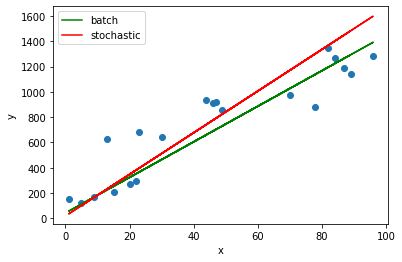

batch      T0, T1: 43.45077557965707, 14.037043579300613
stochastic T0, T1: 19.053162031614992, 16.439550725824105
batch rms:      176.7580500438093
stochastic rms: 207.9822489449876


In [51]:
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, params_hat_batch[0] + params_hat_batch[1]*x_test, 'g', label='batch')
plt.plot(x_test, params_hat[0] + params_hat[1]*x_test, '-r', label='stochastic')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'batch      T0, T1: {params_hat_batch[0]}, {params_hat_batch[1]}')
print(f'stochastic T0, T1: {params_hat[0]}, {params_hat[1]}')
rms_batch = np.sqrt(np.mean(np.square(params_hat_batch[0] + params_hat_batch[1]*x_test - y_test)))
rms_stochastic = np.sqrt(np.mean(np.square(params_hat[0] + params_hat[1]*x_test - y_test)))
print(f'batch rms:      {rms_batch}')
print(f'stochastic rms: {rms_stochastic}')

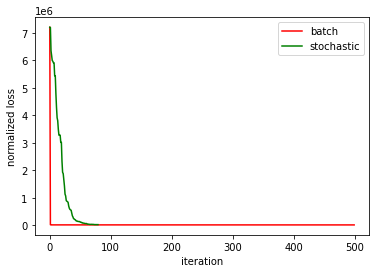

min loss with BGD: 16026.732730609749
min loss with SGD: 26420.98431166435


In [52]:
plt.figure()
plt.plot(np.arange(max_iter), loss_batch, 'r', label='batch')
plt.plot(np.arange(len(loss)), loss, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized loss')
plt.legend()
plt.show()
print(f'min loss with BGD: {np.min(loss_batch)}')
print(f'min loss with SGD: {np.min(loss)}')

Reference:<br><br>
Endless Engineering, ml-vid-code, (2020), GitHub repository, https://github.com/endlesseng/ml-vid-code